In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.0.0-rc0


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# data link = https://www.kaggle.com/mlg-ulb/creditcardfraud

data = pd.read_csv("creditcard.csv")

In [27]:
data.shape

(284807, 31)

In [28]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
data['Class'].value_counts()
#This is highly imbalanced dataset

0    284315
1       492
Name: Class, dtype: int64

### Balance Dataset

In [31]:
non_fraud = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [32]:
non_fraud.shape , fraud.shape

((284315, 31), (492, 31))

In [33]:
#Now we will select 492 records from non_fraud. records should be selected randomly.

non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [34]:
#Lets now merge these two dataframes together.

data = fraud.append(non_fraud, ignore_index = True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,134697.0,2.189292,-0.663296,-1.418668,-1.096806,-0.233084,-0.692229,-0.389778,-0.254238,-0.965586,...,0.493695,1.421238,0.000954,0.853217,0.223169,0.009137,-0.041107,-0.065917,15.00,0
980,38585.0,-0.798931,0.957706,0.792724,0.759220,-0.009245,0.578911,0.472656,0.666481,-1.101889,...,0.353426,0.822373,0.130346,-0.285643,-0.384672,-0.292783,0.048151,0.090561,90.00,0
981,134659.0,2.073987,0.139006,-1.695027,0.427727,0.372098,-0.907665,0.163872,-0.220570,0.539567,...,-0.366572,-0.964057,0.348296,0.559415,-0.272834,0.170773,-0.064568,-0.030933,0.99,0
982,165620.0,2.008470,-0.302754,-0.360221,0.314854,-0.704613,-0.776874,-0.493186,-0.055980,1.442223,...,-0.136484,-0.285410,0.344034,-0.189031,-0.371380,-0.914595,0.054620,-0.029930,1.00,0


In [35]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [39]:
X = data.drop('Class', axis = 1)
y = data['Class']
X.shape, y.shape

((984, 30), (984,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

In [43]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [48]:
X_train.shape

(787, 30)

In [51]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [52]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

## Build CNN

In [53]:
epochs = 20
model = Sequential()
model.add(Conv1D(32,2,activation = 'relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))


In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 32)            2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 896)               0

In [58]:
model.compile(optimizer = Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [59]:
## With model ready, lets train our model

history = model.fit(X_train,y_train, epochs = epochs, validation_data = (X_test,y_test), verbose = 1)

Train on 787 samples, validate on 197 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
787/787 [==============================] - 1s 2ms/sample - loss: 0.6288 - accuracy: 0.6811 - val_loss: 0.6161 - val_accuracy: 0.8325
Epoch 2/20
787/787 [==============================] - 0s 200us/sample - loss: 0.4615 - accuracy: 0.7929 - val_loss: 0.5604 - val_accuracy: 0.8426
Epoch 3/20
787/787 [==============================] - 0s 190us/sample - loss: 0.4313 - accuracy: 0.8259 - val_loss: 0.5170 - val_accuracy: 0.8782
Epoch 4/20
787/787 [==============================] - 0s 173us/sample - loss: 0.3863 - accuracy: 0.8488 - val_loss: 0.4772 - val_accuracy: 0.8985
Epoch 5/20
787/787 [==============================] - 0s 175us/sample - loss: 0.3338 - accuracy: 0.8717 - val_loss: 0.4408 - val_accuracy: 0.9188
Epoch 6/20
787/787 [==============================] - 0s 181us/sample - loss: 0.3273 - accuracy: 0.8755 - val_loss: 0.4053 - val_acc

In [60]:
# now we have the accuracy of both our training set and test set

## Learning Curve (described in video 4)

In [61]:
def plot_learningCurve(history, epoch):
  #Plot training & validation accuracy values
  epoch_range = range(1,epoch + 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy']) # validation set accuracy
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

  # Plot training and validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

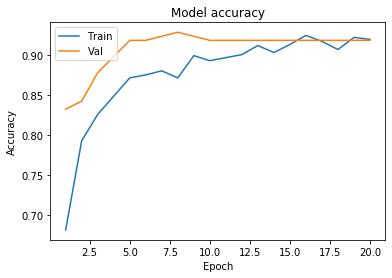

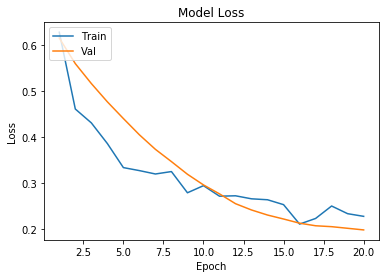

In [63]:
plot_learningCurve(history, epochs)

## This way we can detect the fraudulent credit card transaction

### Adding Maxpool

Train on 787 samples, validate on 197 samples
Epoch 1/50
787/787 [==============================] - 1s 1ms/sample - loss: 1.3424 - accuracy: 0.5146 - val_loss: 0.6959 - val_accuracy: 0.5685
Epoch 2/50
787/787 [==============================] - 0s 191us/sample - loss: 1.0885 - accuracy: 0.5781 - val_loss: 0.6640 - val_accuracy: 0.6497
Epoch 3/50
787/787 [==============================] - 0s 191us/sample - loss: 1.0345 - accuracy: 0.5756 - val_loss: 0.6394 - val_accuracy: 0.6751
Epoch 4/50
787/787 [==============================] - 0s 189us/sample - loss: 0.8564 - accuracy: 0.6277 - val_loss: 0.6202 - val_accuracy: 0.6599
Epoch 5/50
787/787 [==============================] - 0s 182us/sample - loss: 0.8156 - accuracy: 0.6429 - val_loss: 0.6032 - val_accuracy: 0.6650
Epoch 6/50
787/787 [==============================] - 0s 174us/sample - loss: 0.7562 - accuracy: 0.6912 - val_loss: 0.5844 - val_accuracy: 0.6904
Epoch 7/50
787/787 [==============================] - 0s 170us/sample - loss: 0.

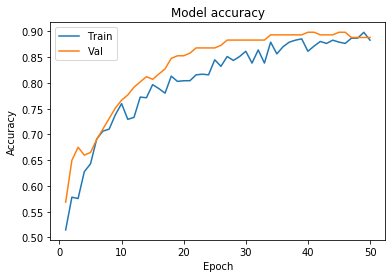

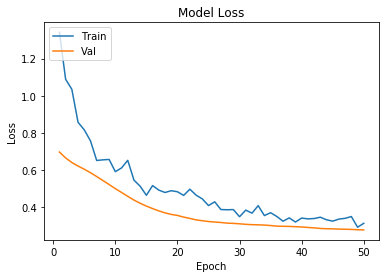

In [66]:
epochs = 50
model = Sequential()
model.add(Conv1D(32,2,activation = 'relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train,y_train, epochs = epochs, validation_data = (X_test,y_test), verbose = 1)
plot_learningCurve(history, epochs)

In [ ]:
# without pooling layer, the accuracy was a bit higher, it seems.